In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [6]:
df['median_house_value'] = np.trunc(df['median_house_value']/1000)

In [7]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15498,-117.23,33.10,4.0,1862.0,291.0,685.0,248.0,7.7450,237.0,NEAR OCEAN
5063,-118.29,33.99,39.0,979.0,235.0,857.0,236.0,2.5547,108.0,<1H OCEAN
1561,-121.96,37.76,8.0,3865.0,463.0,1548.0,432.0,9.7037,425.0,<1H OCEAN
2691,-115.52,32.97,10.0,1879.0,387.0,1376.0,337.0,1.9911,67.0,INLAND
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205.0,<1H OCEAN


In [8]:
df['median_house_value'].describe()

count    20640.000000
mean       206.442297
std        115.455663
min         14.000000
25%        119.000000
50%        179.000000
75%        264.000000
max        500.000000
Name: median_house_value, dtype: float64

C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


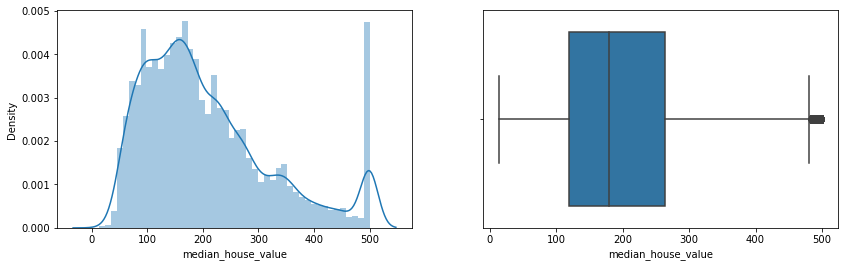

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['median_house_value'])

plt.subplot(1,2,2)
sns.boxplot(df['median_house_value'])

plt.show()

In [10]:
upper_limit = df['median_house_value'].quantile(0.995)
upper_limit

500.0

In [11]:
lower_limit = df['median_house_value'].quantile(0.015)
lower_limit

53.0

In [12]:
# Finding outliers

df[(df['median_house_value'] > upper_limit) | (df['median_house_value'] < lower_limit)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1165,-121.55,39.51,50.0,1050.0,288.0,485.0,260.0,1.1607,51.0,INLAND
1175,-121.57,39.48,15.0,202.0,54.0,145.0,40.0,0.8252,42.0,INLAND
1176,-121.55,39.50,26.0,3215.0,827.0,2041.0,737.0,1.0585,45.0,INLAND
1177,-121.54,39.50,38.0,1438.0,310.0,779.0,275.0,1.3289,39.0,INLAND
1178,-121.53,39.49,19.0,1537.0,329.0,617.0,274.0,1.5313,50.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20514,-121.52,38.58,24.0,938.0,275.0,508.0,253.0,1.6420,32.0,INLAND
20608,-121.59,39.10,24.0,1107.0,261.0,768.0,205.0,1.7167,48.0,INLAND
20610,-121.56,39.10,28.0,2130.0,484.0,1195.0,439.0,1.3631,45.0,INLAND
20611,-121.55,39.10,27.0,1783.0,441.0,1163.0,409.0,1.2857,47.0,INLAND


# Outlier Treatment

# Trimming

In [13]:
new_df = df[(df['median_house_value'] <= upper_limit) & (df['median_house_value'] >= lower_limit)]

In [14]:
new_df.shape

(20334, 10)

In [15]:
new_df['median_house_value'].describe()

count    20334.000000
mean       208.863726
std        114.605029
min         53.000000
25%        122.000000
50%        181.000000
75%        266.000000
max        500.000000
Name: median_house_value, dtype: float64

C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

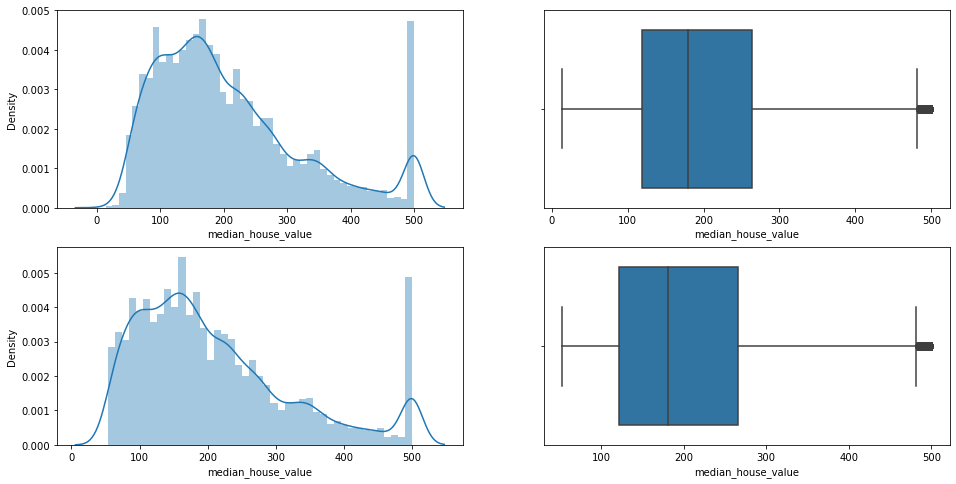

In [16]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['median_house_value'])

plt.subplot(2,2,2)
sns.boxplot(df['median_house_value'])

plt.subplot(2,2,3)
sns.distplot(new_df['median_house_value'])

plt.subplot(2,2,4)
sns.boxplot(new_df['median_house_value'])

plt.show()

# Capping

In [17]:
new_df_cap = df.copy()

new_df_cap['median_house_value'] = np.where(                             # replacing the outliers below lower limit with the lower limit value
    df['median_house_value']>upper_limit,                        # and outliers above upper limit with upper limit value
    upper_limit,
    np.where(
        df['median_house_value']<lower_limit,
        lower_limit,                          # Syntax of np.where ->  (condition; statement if true; statement if false)
        df['median_house_value']
    )
)

C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hembr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

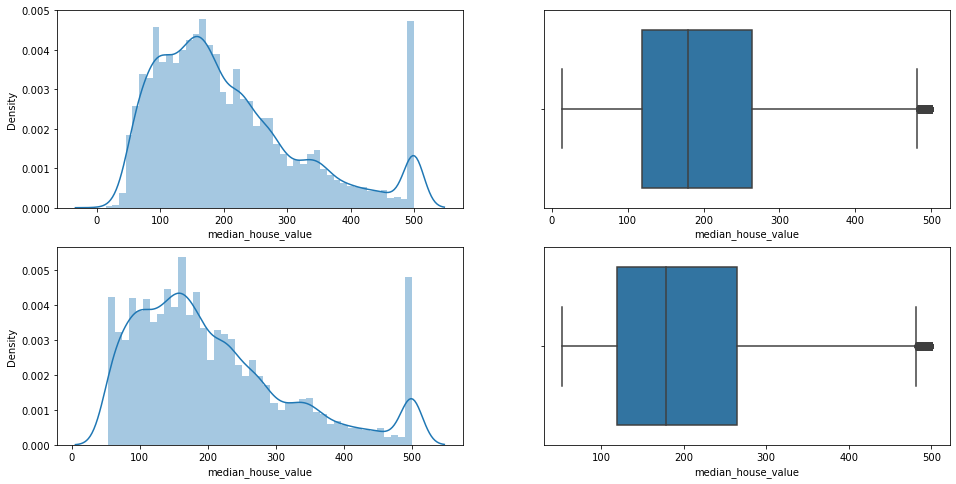

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['median_house_value'])

plt.subplot(2,2,2)
sns.boxplot(df['median_house_value'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['median_house_value'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['median_house_value'])

plt.show()